# Vector Chirped Z-transform (VCZT)


In [1]:
from diffractio import degrees, mm, um
from diffractio import np

from diffractio.scalar_fields_XY import Scalar_field_X
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY
from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY

In [2]:
size = 25 * um
x0 = np.linspace(-size / 2, size / 2, 512)
y0 = np.linspace(-size / 2, size / 2, 256)

focal = 16 * um
wavelength = 0.6328 * um

In [3]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0, 0),
              w0=(32 * um, 32 * um),
              z0=0 * um,
              A=1,
              theta=0. * degrees,
              phi=0 * degrees)
#u0.plane_wave()

In [4]:
t = Scalar_mask_XY(x0, y0, wavelength)
t.lens_cylindrical(x0=0,focal=focal, angle=90*degrees)
t.lens(r0=(0.,0.),focal=focal)


In [5]:
u1 = t * u0

EM1 = Vector_source_XY(x0, y0, wavelength)
EM1.constant_polarization(u=u1, v=(1, 1j))

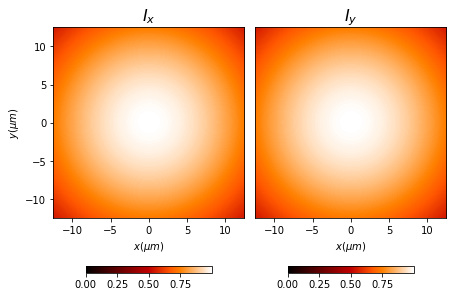

In [6]:
EM1.draw('intensities', logarithm=0)

## to value


In [7]:
x_out = 0.
y_out = 0.
z = focal

In [8]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out, verbose=True)
print(EM2_1D)


((-3.265208662566547-13.896897270999494j), (13.896897270999494-3.265208662566547j), (-5.184741524999481e-14-4.551914400963142e-14j))
CPU times: user 83.6 ms, sys: 96.3 ms, total: 180 ms
Wall time: 123 ms


## to x_field


In [9]:
size_out = 16 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 512)
y_out = 0.
z = focal

CPU times: user 224 ms, sys: 207 ms, total: 431 ms
Wall time: 242 ms


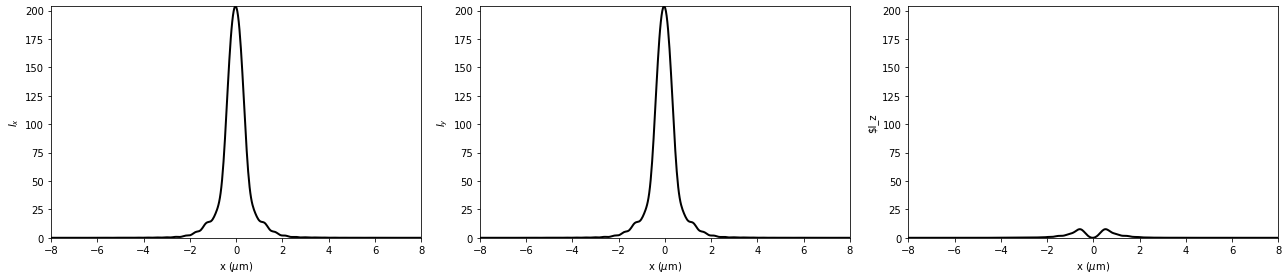

In [10]:
%%time
EM2_1D=EM1.CZT(z, x_out, y_out)
EM2_1D.draw('intensities');

## to z_field


In [11]:
x_out = 0.
y_out = 0.
z = np.linspace(focal - 10 * um, focal + 4 * um, 64)

In [12]:
%%time
EM2=EM1.CZT(z, x_out, y_out, verbose=False);


CPU times: user 4.42 s, sys: 2.1 s, total: 6.52 s
Wall time: 6.52 s


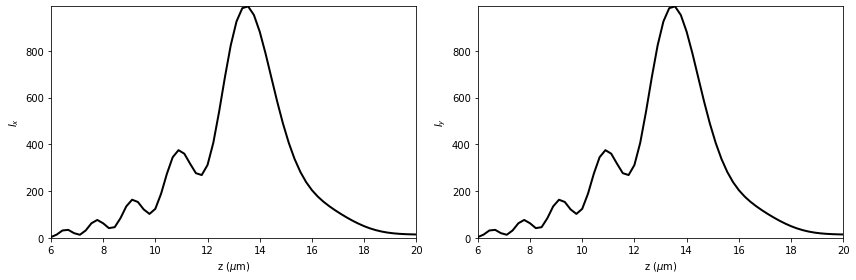

In [13]:
EM2.draw('intensities')

## to XZ_field


In [14]:
size_out = 12 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = 0.
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 64)

In [15]:
%%time
EM2=EM1.CZT(z, x_out, y_out)

CPU times: user 3.46 s, sys: 1.47 s, total: 4.94 s
Wall time: 4.94 s


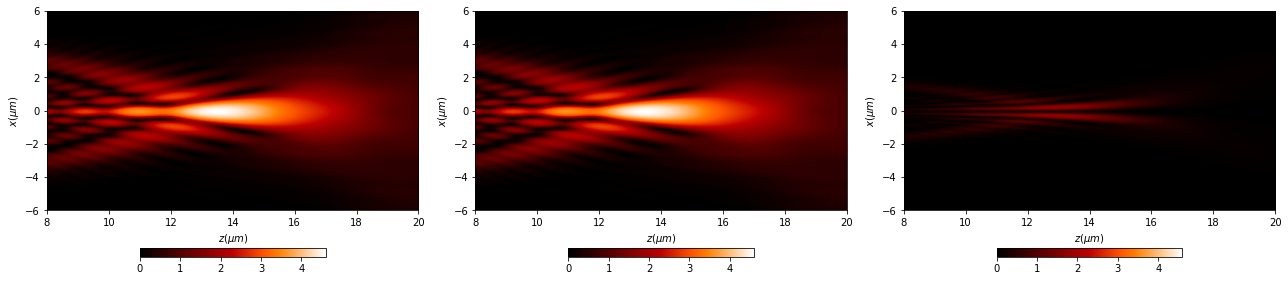

In [16]:
EM2.draw('intensities', logarithm=1e-1)

## to XY_field


In [17]:
size_out = 4 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 128)
y_out = np.linspace(-size_out / 2, size_out / 2, 256)
z = focal - 3*um

In [18]:
%%time
EM2=EM1.CZT(z, x_out, y_out)


CPU times: user 89.2 ms, sys: 43.2 ms, total: 132 ms
Wall time: 131 ms


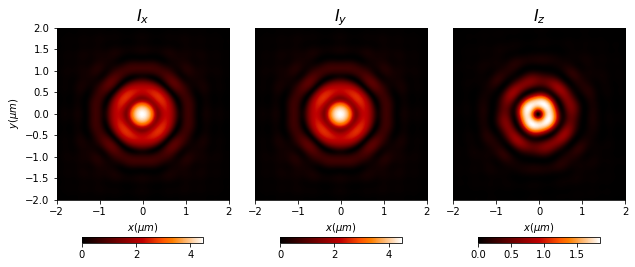

In [19]:
EM2.draw('intensities', logarithm=1e-1)

## to XYZ_field


In [20]:
size_out = 6 * um
x_out = np.linspace(-size_out / 2, size_out / 2, 32)
y_out = np.linspace(-size_out / 2, size_out / 2, 64)
z = np.linspace(focal - 2 * um - 6 * um, focal - 2 * um + 6 * um, 16)

In [21]:
%%time
EM2=EM1.CZT(z, x_out, y_out)

CPU times: user 1.08 s, sys: 295 ms, total: 1.37 s
Wall time: 1.35 s


<Figure size 432x288 with 0 Axes>

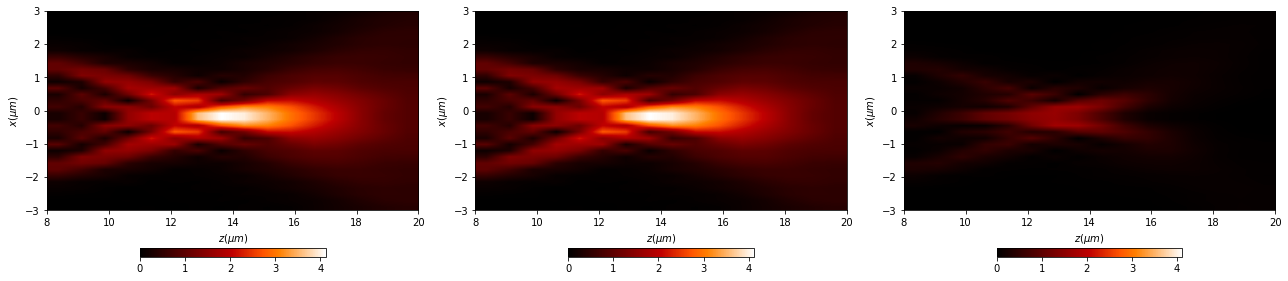

In [22]:
EM2.draw_XZ('intensities', y0=0, logarithm=1e-1)

<Figure size 432x288 with 0 Axes>

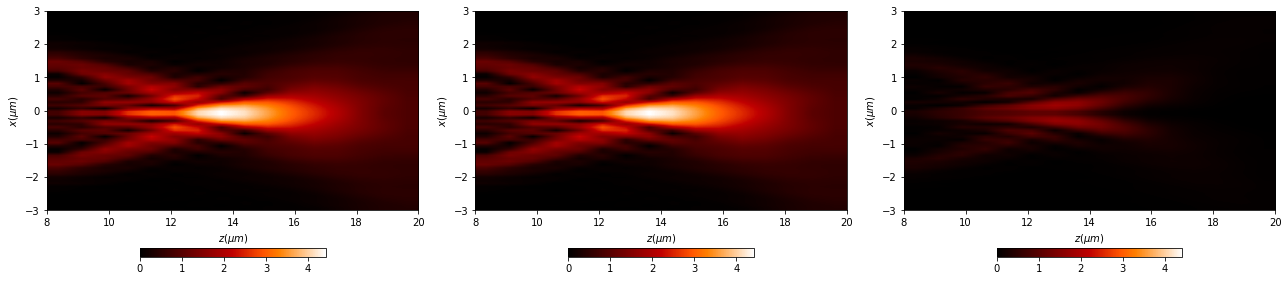

In [23]:
EM2.draw_YZ('intensities', x0=0, logarithm=1e-1)